In [1]:
# 1. Map your Google Drive 
# This cell imports the drive library and mounts your Google Drive as a VM local drive.  
# You can access to your Drive files using this path "/content/gdrive/My Drive/"

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir("/content/drive/My Drive/darknet/cuDNN")

In [0]:
!ls

In [6]:
#download cuDNN form thrid-party Nvidia, save on google drive
!wget http://people.cs.uchicago.edu/~kauffman/nvidia/cudnn/cudnn-10.0-linux-x64-v7.5.0.56.tgz

--2019-09-14 15:16:29--  http://people.cs.uchicago.edu/~kauffman/nvidia/cudnn/cudnn-10.0-linux-x64-v7.5.0.56.tgz
Resolving people.cs.uchicago.edu (people.cs.uchicago.edu)... 128.135.164.80
Connecting to people.cs.uchicago.edu (people.cs.uchicago.edu)|128.135.164.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 432811879 (413M) [application/x-gzip]
Saving to: ‘cudnn-10.0-linux-x64-v7.5.0.56.tgz’

cudnn-10.0-linux-x6 100%[===================>] 412.76M  13.3MB/s    in 43s     

2019-09-14 15:17:13 (9.60 MB/s) - ‘cudnn-10.0-linux-x64-v7.5.0.56.tgz’ saved [432811879/432811879]



In [0]:
!ls

cuDNN  cudnn-10.0-linux-x64-v7.5.0.56.tgz


In [7]:
# 3. Reduce manual interactions on every run 
# Extracts the cuDNN files from Drive folder directly to the VM CUDA folders
!tar -xzvf ./cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2



cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [0]:
#os.chdir("/content/gdrive/My Drive/git")

In [0]:
#!ls

In [0]:
# 4. Don't compile libraries on every run, just once.
# Leave this code uncommented on the very first run of your notebook
# or if you ever need to recompile darknet again.
# Comment this code on the future runs.
#!git clone https://github.com/kriyeng/darknet/
#%cd darknet

# Check the folder
#!ls

Cloning into 'darknet'...
remote: Enumerating objects: 10068, done.
remote: Total 10068 (delta 0), reused 0 (delta 0), pack-reused 10068
Receiving objects: 100% (10068/10068), 9.97 MiB | 4.43 MiB/s, done.
Resolving deltas: 100% (6770/6770), done.
Checking out files: 100% (1956/1956), done.
/content/gdrive/My Drive/git/darknet
3rdparty      CMakeLists.txt	      image_yolov3.sh	     scripts
appveyor.yml  CMakeSettings.json      include		     src
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  video_v2.sh
build.ps1     darknet.py	      LICENSE		     video_yolov3.sh
build.sh      darknet_video.py	      Makefile
cfg	      data		      net_cam_v3.sh
cmake	      image_yolov2.sh	      README.md


In [0]:
# I have a branch where I have done the changes commented below
# !git checkout feature/google-colab

M	build.ps1
M	build.sh
M	image_yolov2.sh
M	image_yolov3.sh
M	json_mjpeg_streams.sh
M	net_cam_v3.sh
M	scripts/gen_tactic.sh
M	video_v2.sh
M	video_yolov3.sh
Branch 'feature/google-colab' set up to track remote branch 'feature/google-colab' from 'origin'.
Switched to a new branch 'feature/google-colab'


In [0]:
# !ls

3rdparty      CMakeLists.txt	      image_yolov3.sh	     scripts
appveyor.yml  CMakeSettings.json      include		     src
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  video_v2.sh
build.ps1     darknet.py	      LICENSE		     video_yolov3.sh
build.sh      darknet_video.py	      Makefile
cfg	      data		      net_cam_v3.sh
cmake	      image_yolov2.sh	      README.md


In [0]:
#Compile Darknet
# !make

mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(mat_cv*, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:896:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sende

In [0]:
# !ls

3rdparty      CMakeLists.txt	      image_yolov3.sh	     results
appveyor.yml  CMakeSettings.json      include		     scripts
backup	      darknet		      json_mjpeg_streams.sh  src
build	      DarknetConfig.cmake.in  LICENSE		     video_v2.sh
build.ps1     darknet.py	      Makefile		     video_yolov3.sh
build.sh      darknet_video.py	      net_cam_v3.sh
cfg	      data		      obj
cmake	      image_yolov2.sh	      README.md


In [0]:
#Copies the Darknet compiled version to Google drive
#!cp ./darknet /content/gdrive/My\ Drive/darknet/bin/darknet

In [0]:
#!pwd

/content/gdrive/My Drive/git/darknet


In [0]:
#!cp /content/gdrive/My\ Drive/darknet/bin/darknet/* /content/gdrive/My\ Drive/darknet

In [0]:
os.chdir("/content/drive/My Drive/darknet/weights")

In [9]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2019-09-14 15:25:41--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  17.3MB/s    in 10s     

2019-09-14 15:25:52 (15.0 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [10]:
!ls -la

total 158675
-rw------- 1 root root 162482580 Mar 25  2018 darknet53.conv.74


In [0]:
# Set execution permissions to Darknet
# !chmod +x ./darknet

In [0]:
# !ls -l -a

total 425823
drwx------ 3 root root      4096 Sep 14 07:48 bin
drwx------ 2 root root      4096 Sep 14 06:25 cuDNN
-rw------- 1 root root 432811879 Mar 19 15:17 cudnn-10.0-linux-x64-v7.5.0.56.tgz
-rwx------ 1 root root   3221752 Sep 14 08:34 darknet


In [0]:
# !pwd

/content/gdrive/My Drive/darknet


In [0]:
os.chdir("/")

In [21]:
!ls

bin	 datalab  home	 lib64	opt   run   swift		  tmp	 var
boot	 dev	  lib	 media	proc  sbin  sys			  tools
content  etc	  lib32  mnt	root  srv   tensorflow-2.0.0-rc0  usr


In [11]:
# %cd ..

/content/drive/My Drive/darknet


In [0]:
# !ls

bin	 datalab  home	 lib64	opt   run   swift		  tmp	 var
boot	 dev	  lib	 media	proc  sbin  sys			  tools
content  etc	  lib32  mnt	root  srv   tensorflow-2.0.0-rc0  usr


In [0]:
#!pwd

/


In [0]:
!mkdir mydarknet

In [23]:
!ls

bin	 dev   lib32  mydarknet  run	sys		      usr
boot	 etc   lib64  opt	 sbin	tensorflow-2.0.0-rc0  var
content  home  media  proc	 srv	tmp
datalab  lib   mnt    root	 swift	tools


In [24]:
%cd mydarknet/

/mydarknet


In [0]:
# Copy the Darkent compiled version to the VM local drive
!cp /content/drive/My\ Drive/darknet/bin/* ./darknet

In [0]:
# Set execution permissions to Darknet
!chmod +x ./darknet

In [0]:
# 6. Copy your data sets to VM local filesystem to improve training speeds. 
# Copy files from Google Drive to the VM local filesystem
# !cp -r "/content/gdrive/My Drive/darknet/img" ./img

In [0]:
# !mv /content/gdrive/My\ Drive /content/gdrive/MyImamCSDrive

mv: failed to access '/content/gdrive/MyImamCSDrive': Transport endpoint is not connected


In [0]:
#!os.chdir('/content/gdrive/MyImamCSDrive')

/bin/bash: -c: line 0: syntax error near unexpected token `'/content/gdrive/MyImamCSDrive''
/bin/bash: -c: line 0: `os.chdir('/content/gdrive/MyImamCSDrive')'


In [0]:
# !ls

darknet  img


In [0]:
# Set execution permissions to Darknet
#!chmod +x /content/drive/My\ Drive/darknet/obj.data
#!chmod +x /content/drive/My\ Drive/git/darknet/cfg/yolov3.cfg
#!chmod +x /content/drive/My\ Drive/darknet/backup/*
#!chmod +x /content/drive/My\ Drive/darknet/train.txt
#!chmod +x /content/drive/My\ Drive/darknet/test.txt
#!chmod -R 755 /content/drive/My\ Drive/git
!chmod -R 755 /content/drive/My\ Drive/darknet

In [0]:
# 8. Get your trained weights directly synced in your computer in real-time during the training 
# Start training at the point where the last runtime finished
# solve Error: l.outputs == params.inputs 
# filters= in the [convolutional]-layer doesn't correspond to classes= or mask= in [yolo]-layer 
# If you are using yolov3:
# This error happens when your filter value is wrong in any of the convolution layer before [yolo] layer
# It should be = num/3*(classes+5)
# If you are using yolov2:
# This error happens when your filter value in convolution layer before region layer is wrong
# It should be = num*(classes+5)
!./darknet detector train "/content/drive/My Drive/darknet/obj.data" "/content/drive/My Drive/darknet/cfg/yolov3.cfg" "/content/drive/My Drive/darknet/weights/darknet53.conv.74" -dont_show

valid: Using default '/content/drive/My Drive/darknet/train.txt'
yolov3
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv   

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
!ls -la

total 20
drwxr-xr-x 1 root root 4096 Sep 15 06:37 .
drwxr-xr-x 1 root root 4096 Sep 15 06:18 ..
drwxr-xr-x 1 root root 4096 Sep  9 16:05 .config
drwx------ 3 root root 4096 Sep 15 06:37 drive
drwxr-xr-x 1 root root 4096 Aug 27 16:17 sample_data


In [0]:
# > "/content/drive/My Drive/darknet/avgTrainLoss/TrainLoss.log"
from google.colab import files
#uploaded = files.upload() # Jika error, coba gunakan browser Chrome
#files.download("./drive/My Drive/darknet/backup/yolov3_2000.weights")



In [0]:
import os
os.chdir('/content/drive/My Drive/')

In [14]:
!ls -la


total 16
drwx------ 2 root root 4096 Apr 27  2015 'Apk Tool'
drwx------ 2 root root 4096 Sep 14 15:08 'Colab Notebooks'
drwx------ 9 root root 4096 Sep 14 14:43  darknet
drwx------ 2 root root 4096 Sep 14 14:45  koding-hijab


In [0]:
# Coba melakukan proses testing
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
import os
os.chdir("/")

In [6]:
os.chdir("/content/drive/My Drive/darknet")
# 3. Reduce manual interactions on every run 
# Extracts the cuDNN files from Drive folder directly to the VM CUDA folders
!tar -xzvf ./cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2


cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [0]:
os.chdir("/")
!mkdir mydarknet
# Copy the Darkent compiled version to the VM local drive
!cp /content/drive/My\ Drive/darknet/bin/* ./mydarknet/darknet
!chmod +x ./mydarknet/darknet
os.chdir("/mydarknet")
#!mkdir -p ./data/labels
!mkdir -p ./data
!cp -R /content/drive/My\ Drive/darknet/labels ./data

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

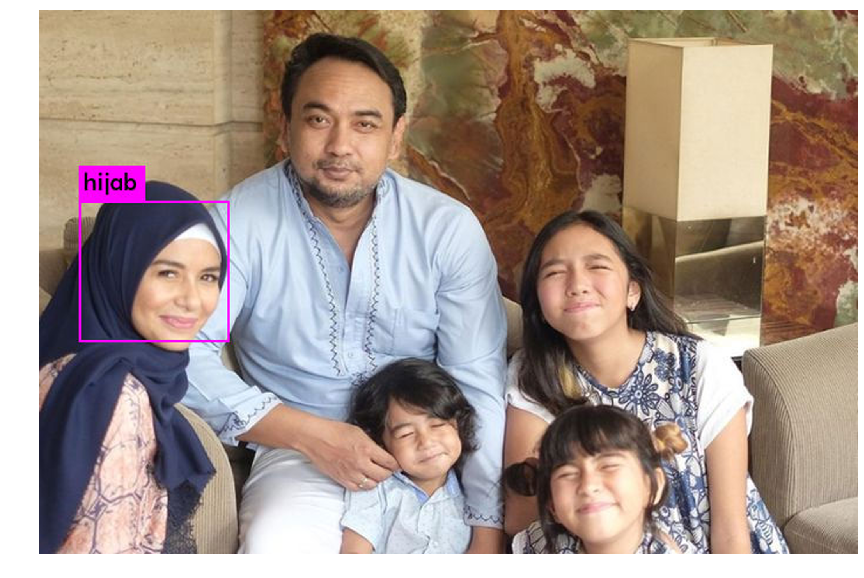

In [26]:
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
#!./darknet detect "/content/drive/My Drive/git/darknet/cfg/yolov3.cfg "/content/drive/My Drive/darknet/backup/yolov3_last.weights" "/content/drive/My Drive/git/darknet/img/1k.jpg" -dont-show
!./darknet detector test "/content/drive/My Drive/darknet/obj.data" "/content/drive/My Drive/darknet/cfg/yolov3.cfg" "/content/drive/My Drive/darknet/backup/yolov3_2000.weights" "/content/drive/My Drive/darknet/testImgFamily/f1.jpg" -thresh 0.85 -dont-show
# Show the result using the helper imgShow()
imShow('predictions.jpg')

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

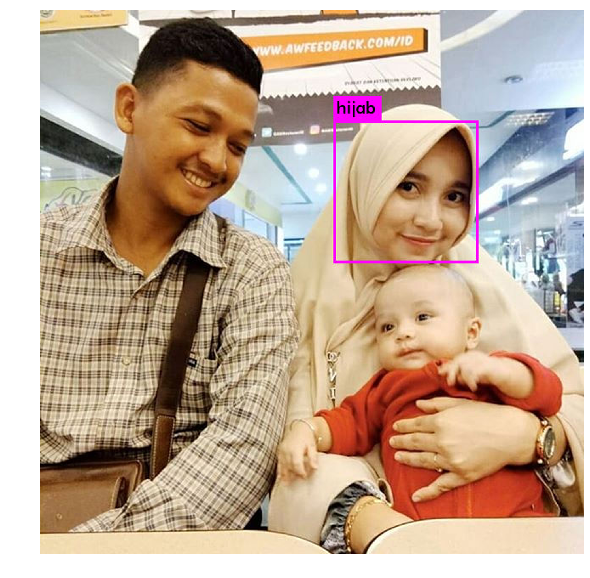

In [28]:
!./darknet detector test "/content/drive/My Drive/darknet/obj.data" "/content/drive/My Drive/darknet/cfg/yolov3.cfg" "/content/drive/My Drive/darknet/backup/yolov3_2000.weights" "/content/drive/My Drive/darknet/testImgFamily/f2.jpg" -thresh 0.9 -dont-show
# Show the result using the helper imgShow()
imShow('predictions.jpg')

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

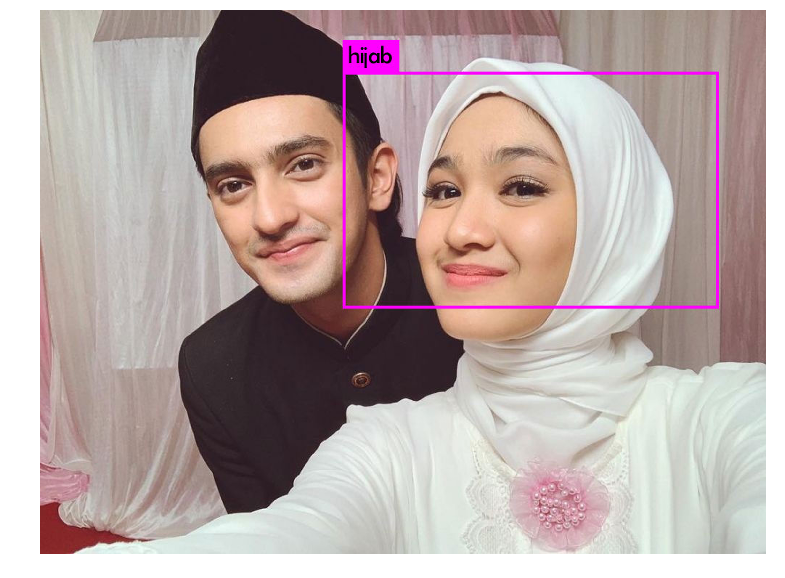

In [30]:
!./darknet detector test "/content/drive/My Drive/darknet/obj.data" "/content/drive/My Drive/darknet/cfg/yolov3.cfg" "/content/drive/My Drive/darknet/backup/yolov3_2000.weights" "/content/drive/My Drive/darknet/testImgFamily/f3.jpg" -thresh 0.95 -dont-show
# Show the result using the helper imgShow()
imShow('predictions.jpg')

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

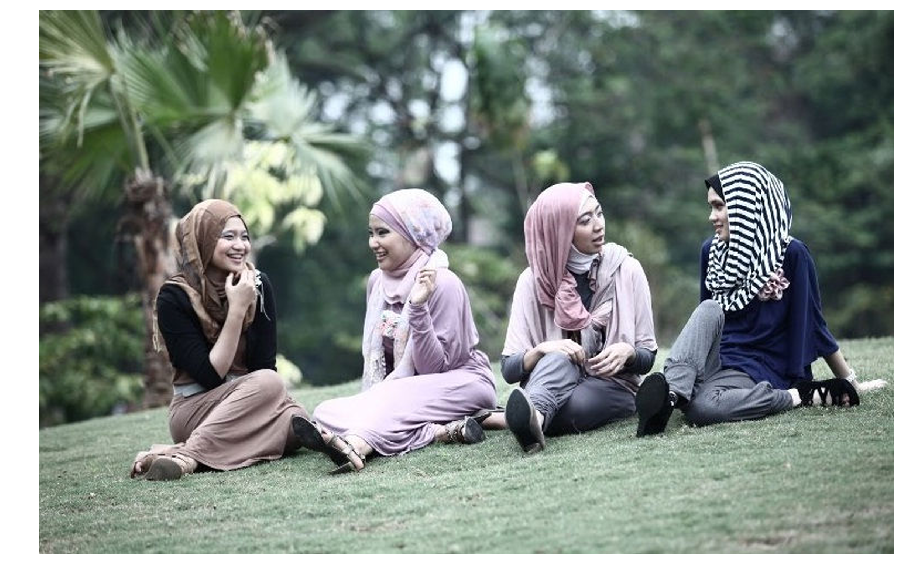

In [11]:
!./darknet detector test "/content/drive/My Drive/darknet/obj.data" "/content/drive/My Drive/darknet/cfg/yolov3.cfg" "/content/drive/My Drive/darknet/backup/yolov3_last.weights" "/content/drive/My Drive/darknet/testImg/t11.jpg" -dont-show
# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [10]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os, time
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def worker():
  if SHOW_GPU_USAGE_TIME == 0:
    return;
  while True:
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
    time.sleep(SHOW_GPU_USAGE_TIME)

import threading
t = threading.Thread(target=worker, name='Monitor')
t.start()


  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=ee800a48893107b00499ac1e8c89652cbf5a0380c3057fa11b508c9045c9097d
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil


In [14]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [15]:
# Cek namaa GPU
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12795511117359824396, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17496461143943563948
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12009187282164748207
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11330115994
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10260290368107288515
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [19]:
# Cek RAM
!cat /proc/meminfo
!free -g

MemTotal:       13335192 kB
MemFree:         5306436 kB
MemAvailable:   12280876 kB
Buffers:           86328 kB
Cached:          6834152 kB
SwapCached:            0 kB
Active:          1275984 kB
Inactive:        6296292 kB
Active(anon):     503796 kB
Inactive(anon):     2376 kB
Active(file):     772188 kB
Inactive(file):  6293916 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               240 kB
Writeback:             0 kB
AnonPages:        651868 kB
Mapped:           438084 kB
Shmem:              2944 kB
Slab:             273952 kB
SReclaimable:     233796 kB
SUnreclaim:        40156 kB
KernelStack:        4464 kB
PageTables:         7548 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667596 kB
Committed_AS:    3570972 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:     59392 kB
ShmemHugePages:  

In [20]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   33G  308G  10% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1       365G   41G  325G  12% /opt/bin
shm             6.0G  4.0K  6.0G   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  1.6G   14G  11% /content/drive


In [17]:
#Cek CPU
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [0]:
# utk restarrt Google Colab
# !kill -9 -1